### Libraries

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tweepy
import csv
import os
import pandas as pd

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import jaccard_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [120]:
consumer_key = 'ehVT0RhXW6AmfESk0KELKx8E0'
consumer_secret = 'vCodO28e6hYSv0zxPbk9ltUSZvEHoB4PBSC6ttKHVaeIMNY596' 
access_token = '1090548436712091650-gMtb94dVouNribwt0i4be3d2RrUOvI' 
access_secret = 'wdC6C4Zvfv0eiZhgF30bP4YSzBKeDgDJja52OJdfHEC0m'

# membuat object authentication ke API Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# mensetting access token and secret key
auth.set_access_token(access_token, access_secret)
# melakukan authentication ke Twitter API
api = tweepy.API(auth)

In [121]:
#Mengumpulkan cuitan dengan #CPNS2020
tweets_data = []
api = tweepy.API(auth, wait_on_rate_limit=True)
for tweet in tweepy.Cursor(api.search,q="CPNS2019",since="2020-11-1").items(1000):
    tweets_data.append([tweet.author.screen_name,
                        tweet.lang,
                        tweet.created_at,
                        tweet.favorite_count,
                        tweet.retweet_count,
                        tweet.text,
                        tweet.user.location])
print(tweets_data)

[['MasArdy55351211', 'in', datetime.datetime(2020, 11, 28, 12, 13, 56), 0, 0, '@BKDTegalKab @PemkabTegal @umiazizah60 Progres penetapan NIP CPNS2019 gmna min?😇', ''], ['Roy_Ritonga', 'in', datetime.datetime(2020, 11, 28, 10, 33, 7), 0, 69, 'RT @BKNgoid: #SobatBKN, Mimin mau ingetin buat kalian kalau hari ini adalah batas akhir pemberkasan online #CPNS2019 di portal https://t.co…', 'Medan, Sumatera Utara'], ['zahrafryna', 'in', datetime.datetime(2020, 11, 28, 9, 11, 4), 0, 2180, 'RT @p3kcpns: -- THREAD KUMPULAN BUKU CPNS DPF GRATIS --\n\nOke kali ini berhubung jelang CPNS 2019, mau kembali berbagi file soal, materi ata…', 'Yogyakarta, Indonesia'], ['p3kcpns', 'in', datetime.datetime(2020, 11, 28, 3, 57, 36), 0, 2180, 'RT @p3kcpns: -- THREAD KUMPULAN BUKU CPNS DPF GRATIS --\n\nOke kali ini berhubung jelang CPNS 2019, mau kembali berbagi file soal, materi ata…', 'Indihiang, Indonesia'], ['gue_widagdo', 'in', datetime.datetime(2020, 11, 27, 22, 59, 55), 2, 0, 'H+10 Alhamdulillah terpantau 

In [40]:
#Mengubah data cuitan ke dalam DataFrame
import pandas as pd
tweets_pd = pd.DataFrame(tweets_data,
                         columns=['screen_name', 'lang', 'created_at', 'fav_count', 'retweet_count', 'text', 'location'])
display(tweets_pd)

,screen_name,lang,created_at,fav_count,retweet_count,text,location
0,MasArdy55351211,in,2020-11-28 12:13:56,0,0,@BKDTegalKab @PemkabTegal @umiazizah60 Progres...,
1,Roy_Ritonga,in,2020-11-28 10:33:07,0,69,"RT @BKNgoid: #SobatBKN, Mimin mau ingetin buat...","Medan, Sumatera Utara"
2,zahrafryna,in,2020-11-28 09:11:04,0,2180,RT @p3kcpns: -- THREAD KUMPULAN BUKU CPNS DPF ...,"Yogyakarta, Indonesia"
3,p3kcpns,in,2020-11-28 03:57:36,0,2180,RT @p3kcpns: -- THREAD KUMPULAN BUKU CPNS DPF ...,"Indihiang, Indonesia"
4,gue_widagdo,in,2020-11-27 22:59:55,1,0,H+10 Alhamdulillah terpantau 100%acc next step...,
...,...,...,...,...,...,...,...
107,elfhap,in,2020-11-20 03:34:45,0,31,RT @abiridwan2173: In the middle of difficulty...,Indonesia
108,risma13314861,in,2020-11-20 03:34:29,0,31,RT @abiridwan2173: In the middle of difficulty...,
109,aigokamjagiyaa,in,2020-11-20 03:29:41,0,31,RT @abiridwan2173: In the middle of difficulty...,
110,Mas_Hardiyanto,in,2020-11-20 03:29:41,0,31,RT @abiridwan2173: In the middle of difficulty...,


In [42]:
 #Mengumpulkan cuitan dengan #SObatBKN
 tweets_data1 = []
api = tweepy.API(auth, wait_on_rate_limit=True)
for tweet in tweepy.Cursor(api.search,q="SobatBKN",since="2020-10-1").items(1000):
    tweets_data1.append([tweet.author.screen_name,
                        tweet.lang,
                        tweet.created_at,
                        tweet.favorite_count,
                        tweet.retweet_count,
                        tweet.text,
                        tweet.user.location])
print(tweets_data1)

[['Roy_Ritonga', 'in', datetime.datetime(2020, 11, 28, 10, 33, 7), 0, 69, 'RT @BKNgoid: #SobatBKN, Mimin mau ingetin buat kalian kalau hari ini adalah batas akhir pemberkasan online #CPNS2019 di portal https://t.co…', 'Medan, Sumatera Utara'], ['kadek_susani', 'in', datetime.datetime(2020, 11, 27, 14, 41, 14), 0, 300, 'RT @BKNgoid: #SobatBKN, Penetapan TMT Peserta Lulus Seleksi CPNS 2019 Bergantung Usul Masuk Instansi https://t.co/UubdX3JUJN', 'indonesia'], ['updatecpns_com', 'in', datetime.datetime(2020, 11, 27, 13, 41, 51), 1, 0, 'Hai hai #sobatBKN kesayangan gimana kabarnya? Mimin mau nyampein kabar gembira nih buat #sobatBKN yang dari kemaren… https://t.co/0jLQ3aX9Tv', ''], ['updatecpns_com', 'in', datetime.datetime(2020, 11, 27, 13, 40, 43), 2, 0, 'Update Pertek dan Penetapan NIP #CPNS2019.\nHingga hari ini Jumat (27/11/2020) telah terbit Pertek dan Penetapan NIP… https://t.co/yYYAcMu58Y', ''], ['4dysuryanugraha', 'in', datetime.datetime(2020, 11, 26, 12, 30, 1), 0, 7, 'RT @BKNgoi

In [43]:
#Mengubah data cuitan ke dalam DataFrame
import pandas as pd
tweets_pd1 = pd.DataFrame(tweets_data1,
                         columns=['screen_name', 'lang', 'created_at', 'fav_count', 'retweet_count', 'text', 'location'])
display(tweets_pd1)

,screen_name,lang,created_at,fav_count,retweet_count,text,location
0,Roy_Ritonga,in,2020-11-28 10:33:07,0,69,"RT @BKNgoid: #SobatBKN, Mimin mau ingetin buat...","Medan, Sumatera Utara"
1,kadek_susani,in,2020-11-27 14:41:14,0,300,"RT @BKNgoid: #SobatBKN, Penetapan TMT Peserta ...",indonesia
2,updatecpns_com,in,2020-11-27 13:41:51,1,0,Hai hai #sobatBKN kesayangan gimana kabarnya? ...,
3,updatecpns_com,in,2020-11-27 13:40:43,2,0,Update Pertek dan Penetapan NIP #CPNS2019.\nHi...,
4,4dysuryanugraha,in,2020-11-26 12:30:01,0,7,"RT @BKNgoid: Hai #SobatBKN, terkait surat usul...",Sidoarjo|Jawa Timur|Indonesia
...,...,...,...,...,...,...,...
76,SUPRIYA28039536,in,2020-11-20 10:05:42,0,1,RT @bkn2surabaya: Inga...Inga...Pascaterima no...,
77,bkn2surabaya,in,2020-11-20 10:02:53,9,1,Inga...Inga...Pascaterima notifikasi dari Docu...,"Sidoarjo, Surabaya"
78,hartonoan_,in,2020-11-20 05:55:57,0,300,"RT @BKNgoid: #SobatBKN, Penetapan TMT Peserta ...",
79,OnikSri,in,2020-11-20 05:54:42,0,178,RT @BKNgoid: Dalam masa pemberkasan CPNS2019 i...,


In [44]:
#Mengumpulkan cuitan dengan #ASNKiniBeda
tweets_data2 = []
api = tweepy.API(auth, wait_on_rate_limit=True)
for tweet in tweepy.Cursor(api.search,q="ASNKiniBeda",since="2020-10-1").items(1000):
    tweets_data2.append([tweet.author.screen_name,
                        tweet.lang,
                        tweet.created_at,
                        tweet.favorite_count,
                        tweet.retweet_count,
                        tweet.text,
                        tweet.user.location])
print(tweets_data2)

[['PratiknaAnanta', 'in', datetime.datetime(2020, 11, 29, 1, 0, 57), 1, 0, 'Kapolres Kulonprogo beserta Staf dan Jajaran mengucapkan Selamat HUT KORPRI ke-49,\n.\n#HUTKORPRIKe49\n#HUTKORPRI… https://t.co/HqkOQuCvoM', ''], ['LendahPolres', 'in', datetime.datetime(2020, 11, 29, 0, 36, 25), 0, 0, 'Kapolres Kulonprogo beserta Staf dan Jajaran mengucapkan Selamat HUT KORPRI ke-49,\n “Abdi Negara KORPRI berkontribu… https://t.co/0LRJVP82RX', ''], ['Gedeantaragmai1', 'in', datetime.datetime(2020, 11, 29, 0, 23, 23), 1, 0, 'Kapolres Kulonprogo beserta Staf dan Jajaran mengucapkan Selamat HUT KORPRI ke-49,\n “Abdi Negara KORPRI berkontribu… https://t.co/1KXF4nnZ0U', ''], ['kanimsurakarta', 'in', datetime.datetime(2020, 11, 28, 13, 30, 28), 0, 0, 'Tidak hanya glow up fisik, tapi glow up juga pelayanan petugasnya. Semoga glow up-nya kantor Miska ini bermanfaat b… https://t.co/iENvJenNDm', 'Surakarta, Jawa Tengah'], ['tribunkaltim', 'und', datetime.datetime(2020, 11, 28, 3, 56, 49), 0, 0, 'https:/

In [45]:
#Mengubah data cuitan ke dalam DataFrame
import pandas as pd
tweets_pd2 = pd.DataFrame(tweets_data2,
                         columns=['screen_name', 'lang', 'created_at', 'fav_count', 'retweet_count', 'text', 'location'])
display(tweets_pd2)

,screen_name,lang,created_at,fav_count,retweet_count,text,location
0,PratiknaAnanta,in,2020-11-29 01:00:57,1,0,Kapolres Kulonprogo beserta Staf dan Jajaran m...,
1,LendahPolres,in,2020-11-29 00:36:25,0,0,Kapolres Kulonprogo beserta Staf dan Jajaran m...,
2,Gedeantaragmai1,in,2020-11-29 00:23:23,1,0,Kapolres Kulonprogo beserta Staf dan Jajaran m...,
3,kanimsurakarta,in,2020-11-28 13:30:28,0,0,"Tidak hanya glow up fisik, tapi glow up juga p...","Surakarta, Jawa Tengah"
4,tribunkaltim,und,2020-11-28 03:56:49,0,0,https://t.co/e9gmsqdna7\n#gaji #asnkinibeda #PNS,"Balikpapan, Indonesia"
5,toycrane1,in,2020-11-27 13:18:16,6,0,Terima kasih banyak dukungan dan doa baik2nya ...,
6,tribunkaltim,und,2020-11-27 00:00:19,0,0,https://t.co/W4pNpQ7hLF\n#pppk #p3k #ASN #asnk...,"Balikpapan, Indonesia"
7,BPOM_Manokwari,in,2020-11-26 23:40:09,0,0,"Repost : #BPOM_RI\n#SahabatBPOM, Badan POM sel...","Papua Barat, Indonesia"
8,BPOM_Manokwari,in,2020-11-26 08:38:20,0,0,Repost : #BPOM_RI\nPengumuman Seleksi Terbuka ...,"Papua Barat, Indonesia"
9,KABUPATENFAKFAK,in,2020-11-25 14:02:33,0,1,RT @BPOM_Manokwari: Repost : #BPOM_RI\n#Sahaba...,"FAKFAK, WEST PAPUA INDONESIA"


In [46]:
bytes_to_write = tweets_pd.to_csv('TagarCPNS2019.csv')

In [47]:
bytes_to_write = tweets_pd1.to_csv('TagarSobatBKN.csv')

In [48]:
bytes_to_write = tweets_pd2.to_csv('ASNKiniBeda.csv')

In [49]:
data1=pd.read_csv('TagarCPNS2019.csv')
#data1.head()

data2=pd.read_csv('TagarSobatBKN.csv')
#data2.head()

data3=pd.read_csv('ASNKiniBeda.csv')
#data3.head()

data1=pd.DataFrame(data1)
data2=pd.DataFrame(data2)
data3=pd.DataFrame(data3)

In [51]:
Alldata = pd.concat([data1,data2,data3])
Alldata.to_csv('Alldata.csv')
Alldata.shape

(219, 8)

In [122]:
df = pd.read_csv('Alldata.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,screen_name,lang,created_at,fav_count,retweet_count,text,location
0,0,0,MasArdy55351211,in,2020-11-28 12:13:56,0,0,@BKDTegalKab @PemkabTegal @umiazizah60 Progres...,NaN
1,1,1,Roy_Ritonga,in,2020-11-28 10:33:07,0,69,"RT @BKNgoid: #SobatBKN, Mimin mau ingetin buat...","Medan, Sumatera Utara"
2,2,2,zahrafryna,in,2020-11-28 09:11:04,0,2180,RT @p3kcpns: -- THREAD KUMPULAN BUKU CPNS DPF ...,"Yogyakarta, Indonesia"
3,3,3,p3kcpns,in,2020-11-28 03:57:36,0,2180,RT @p3kcpns: -- THREAD KUMPULAN BUKU CPNS DPF ...,"Indihiang, Indonesia"
4,4,4,gue_widagdo,in,2020-11-27 22:59:55,1,0,H+10 Alhamdulillah terpantau 100%acc next step...,NaN


In [123]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop(['lang', 'created_at','fav_count','retweet_count','location'], axis=1)


,screen_name,text
0,MasArdy55351211,@BKDTegalKab @PemkabTegal @umiazizah60 Progres...
1,Roy_Ritonga,"RT @BKNgoid: #SobatBKN, Mimin mau ingetin buat..."
2,zahrafryna,RT @p3kcpns: -- THREAD KUMPULAN BUKU CPNS DPF ...
3,p3kcpns,RT @p3kcpns: -- THREAD KUMPULAN BUKU CPNS DPF ...
4,gue_widagdo,H+10 Alhamdulillah terpantau 100%acc next step...
...,...,...
214,BPOM_Manokwari,"Repost : #BPOM_RI\n#SahabatBPOM, berikut penje..."
215,BPOM_Manokwari,"Repost : #BPOM_RI\n#SahabatBPOM, berikut penje..."
216,ajisubekti90,@BKNgoid\n@tjahjo_kumolo\n@riekediahp\n@kempan...
217,ajisubekti90,@BKNgoid Dan hingga hari ini 21/11/2020 tidak ...


### Text Classification

#### 1. Cleaning text tidak penting

In [124]:
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

df = clean_text(df, 'text')
df.head()

,screen_name,lang,created_at,fav_count,retweet_count,text,location
0,MasArdy55351211,in,2020-11-28 12:13:56,0,0,progres penetapan nip cpns2019 gmna min,NaN
1,Roy_Ritonga,in,2020-11-28 10:33:07,0,69,sobatbkn mimin mau ingetin buat kalian kalau...,"Medan, Sumatera Utara"
2,zahrafryna,in,2020-11-28 09:11:04,0,2180,thread kumpulan buku cpns dpf gratis oke ka...,"Yogyakarta, Indonesia"
3,p3kcpns,in,2020-11-28 03:57:36,0,2180,thread kumpulan buku cpns dpf gratis oke ka...,"Indihiang, Indonesia"
4,gue_widagdo,in,2020-11-27 22:59:55,1,0,h10 alhamdulillah terpantau 100acc next step b...,NaN


In [125]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) 
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
df.text = df.text.apply(furnished)

In [126]:
df.sample(5)

,screen_name,lang,created_at,fav_count,retweet_count,text,location
123,bankdann,in,2020-11-23 10:57:04,0,387,selamat pagi keberkahan u kita semua perlu sob...,NaN
67,riceinabowl131,in,2020-11-21 05:34:25,0,69,sobatbkn mimin mau ingetin buat kalian kalau h...,Outer Space 🛸
195,Gedeantaragmai1,in,2020-11-29 00:23:23,1,0,kapolres kulonprogo beserta staf dan jajaran m...,NaN
72,stqmhh,in,2020-11-21 05:08:24,0,69,sobatbkn mimin mau ingetin buat kalian kalau h...,Banjarmasin
64,liau93,in,2020-11-21 05:55:52,0,69,sobatbkn mimin mau ingetin buat kalian kalau h...,Indonesia


2. Mendefinisikan Kumpulan Kata

In [127]:
economy_related_words = '''infrastruktur pertanian kapitalisme perdagangan sektor jasa teknologi penawaran ekonomis
                          efisiensi industrialisme penghematan penghematan pengurangan nilai debit kredit
                         menghemat hemat secara ekonomis
                         ekonomi lesu naik belanja melestarikan tren
                         penurunan manajemen industri berdampak buruk
                            penurunan surplus profesi
                         penurunan percepatan sektor bunga keseimbangan stabilitas produktivitas meningkatkan tingkat suku bunga
                            mendorong perluasan menstabilkan tingkat pinjaman industri yang berjuang
                           defisit memprediksi peningkatan data
                          analis ekonom perusahaan ekonomi berbasis pasar investasi bebas hutang
                         Metrik nilai tukar menengah savepoint kelangkaan modal bisnis dana pemegang saham perusahaan bank
                         aset treasury pariwisata pendapatan kontraksi lapangan kerja meningkatkan deflasi makroekonomi
                         Kebangkrutan eksportir hiperinflasi dolar kewirausahaan meningkatkan devaluasi perdagangan pasar
                         quicksave deindustrialisasi pasar saham reflation downspin dollarisasi withholder bankroll modal ventura
                         reksa dana rencana ekonomi pemberi pinjaman hipotek tingkat pengangguran krisis kredit bank sentral lembaga keuangan
                         suku bunga bank bea masuk produksi massal pasar gelap negara berkembang mengembangkan pertumbuhan ekonomi gdp perdagangan barter
                         ekonomi penurunan distribusi'''

In [128]:
social_related_words = '''sosialisasi sosial politik yang ramah, suka berteman sosial, sosialisasi politik
                        antarpribadi etnis sosial partai kesejahteraan komunitas masyarakat sosialis pembangunan masyarakat
                            jaringan manusia sosialisme kolektif perusahaan pribadi konstruktivisme sosial
                        relasi akan kewarganegaraan hak sikap kasar socio
                        etika sosial ekonomi perkawinan komunal sipil sosial sosial
                         serikat kebijakan
                        lembaga menghargai jambore organisasi pemerintah
                         pesta dukungan keadilan keadilan
                         sisi aktivisme psikososial yang tidak sosial
                        mensosialisasikan reuni partisipasi demografis distribusi psikologis
                        partygoer partyism meriah power jaringan gala perayaan pindah rumah counterparty perang sosial
                        asosial ideasional partikularis interaksional'''

In [129]:
culture_related_words  = '''warisan etnisitas modernitas spiritualitas marxisme budaya material
                           ethos kebangsaan humanisme romantisme peradaban tradisionalisme genetika
                        Kekerabatan perkawinan hereditas adat membudayakan arkeologi
                       pakaian modern viniculture ontogenesis berakar
                       akar sejarah masyarakat cicero mempengaruhi geografi sejarah asal rakyat
                       Fenomena teleologi perspektif aspek kuno liberalisme saat ini gaya komunitas unik lazim digambarkan
                         hari ini asal mula kepercayaan modernitas bergenre suku barbar
                       penjajahan budaya organisasi universal peradaban barat strukturalisme budaya
                       budaya transkulturasi kafir pagan petani klasik nativisme anarki ungrown kultus filosofis
                       Kesadaran bro-culture Islam mengembangkan diaspora kultus setelah berkembangnya relativisme budaya asli
                       Epistemologi kosmopolitan mongolian menghayati keberagaman chauvinisme westernisasi materialisme vernakular
                       homogenitas otherness holism tusculanae disputationes primitivism superficiality hedonism wacana
                       puritanisme modernisme intelektualisme eksklusifitas elitisme kolonialisme
                       pantekostalisme paganisme ekspansi nasional kimono pembantu pedesaan
                       membudayakan alethophobia nettlebed japanification dongyi clannishness insularity hybridity
                       westernisasi keasingan pandangan dunia exclusionism enkulturasi etnosentrisme confucianist vulgarization
                       shintoisme westernisme denominasionalisme derasinasi
                        kosmologi eurosentrisme, emosi, bohemianisme, teritorialisme
                       Filsafat-doktrin etnis minoritas sosial-darwinisme teori evolusi budaya sistem kepercayaan musik rakyat
                       rumah seni tradisional karl-marx theorymedia
                       museum sejarah seni film-teori mempelajari artefak budaya'''

In [130]:
health_related_words = '''penyakit obesitas organisasi kesehatan dunia kedokteran gizi kebugaran latihan kesejahteraan kesehatan kesehatan masyarakat
                     Keperawatan stres keselamatan penelitian kebersihan kesehatan sosial membantu epidemiologi kesehatan kesejahteraan
                     perawatan penyakit pendidikan diet medis penyakit menular kesehatan lingkungan rumah sakit kebugaran fisik
                     dokter penyedia perawatan kesehatan komunitas yang sehat desain asuransi sanitasi tubuh manusia pasien kesehatan mental
                      Medicare pertanian ilmu kesehatan kebugaran kebijakan kesehatan penurunan berat badan terapi fisik psikologi farmasi
                     organisme metabolik status gaya hidup manusia tidak sehat vaksinasi optimis tidur kondom alkohol keluarga merokok air
                     eudaimonia eudaemonia air house pencegahan genetika keluarga masyarakat miskin membutuhkan pengobatan penyakit menular
                     studi perlindungan pengembangan malaria manajemen prioritas pangan kesehatan mental menyediakan administrasi departemen
                     Program membantu bantuan pendanaan lingkungan meningkatkan kebutuhan darurat Program sekolah yang terkena penyakit mental swasta
                     mengobati penyakit kesuburan penyakit kesuburan perinatal apoteker perilaku bidan
                     gerontologi infertilitas rawat inap kebidanan kolesterol perawatan anak dokter anak pediatrik medicaid asma
                     pensiun penyakit push-up pendidikan jasmani indeks massa tubuh makan dengan baik alat senam tune up selamat pagi
                     mandi tekanan darah rendah serangan jantung klub kesehatan naik sepeda Anda merasa baik eksim urtikaria dermatitis terbakar sinar matahari terlalu banyak kerja
                     manufaktur sosiologi medis perlu latihan lari'''

#### 3. Preprocessing Kata.

 #### Tokenizing dan menghapus kata 

In [132]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


In [133]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

#### Removing duplicates

In [63]:
# delete duplicates
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy

'infrastruktur pertanian kapitalisme perdagangan sektor jasa teknologi penawaran ekonomis efisiensi industrialisme penghematan pengurangan nilai debit kredit menghemat hemat secara ekonomi lesu naik belanja melestarikan tren penurunan manajemen industri berdampak buruk surplus profesi percepatan bunga keseimbangan stabilitas produktivitas meningkatkan tingkat suku mendorong perluasan menstabilkan pinjaman yang berjuang defisit memprediksi peningkatan data analis ekonom perusahaan berbasis pasar investasi bebas hutang metrik tukar menengah savepoint kelangkaan modal bisnis dana pemegang saham bank aset treasury pariwisata pendapatan kontraksi lapangan kerja deflasi makroekonomi kebangkrutan eksportir hiperinflasi dolar kewirausahaan devaluasi quicksave deindustrialisasi reflation downspin dollarisasi withholder bankroll ventura reksa rencana pemberi hipotek pengangguran krisis sentral lembaga keuangan bea masuk produksi massal gelap negara berkembang mengembangkan pertumbuhan gdp barter

In [64]:
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social

'sosialisasi sosial politik yang ramah, suka berteman sosial, antarpribadi etnis partai kesejahteraan komunitas masyarakat sosialis pembangunan jaringan manusia sosialisme kolektif perusahaan pribadi konstruktivisme relasi akan kewarganegaraan hak sikap kasar socio etika ekonomi perkawinan komunal sipil serikat kebijakan lembaga menghargai jambore organisasi pemerintah pesta dukungan keadilan sisi aktivisme psikososial tidak mensosialisasikan reuni partisipasi demografis distribusi psikologis partygoer partyism meriah power gala perayaan pindah rumah counterparty perang asosial ideasional partikularis interaksional'

In [65]:
string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'warisan etnisitas modernitas spiritualitas marxisme budaya material ethos kebangsaan humanisme romantisme peradaban tradisionalisme genetika kekerabatan perkawinan hereditas adat membudayakan arkeologi pakaian modern viniculture ontogenesis berakar akar sejarah masyarakat cicero mempengaruhi geografi asal rakyat fenomena teleologi perspektif aspek kuno liberalisme saat ini gaya komunitas unik lazim digambarkan hari mula kepercayaan bergenre suku barbar penjajahan organisasi universal barat strukturalisme transkulturasi kafir pagan petani klasik nativisme anarki ungrown kultus filosofis kesadaran bro-culture islam mengembangkan diaspora setelah berkembangnya relativisme asli epistemologi kosmopolitan mongolian menghayati keberagaman chauvinisme westernisasi materialisme vernakular homogenitas otherness holism tusculanae disputationes primitivism superficiality hedonism wacana puritanisme modernisme intelektualisme eksklusifitas elitisme kolonialisme pantekostalisme paganisme ekspansi n

In [66]:
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health

'penyakit obesitas organisasi kesehatan dunia kedokteran gizi kebugaran latihan kesejahteraan masyarakat keperawatan stres keselamatan penelitian kebersihan sosial membantu epidemiologi perawatan pendidikan diet medis menular lingkungan rumah sakit fisik dokter penyedia komunitas yang sehat desain asuransi sanitasi tubuh manusia pasien mental medicare pertanian ilmu kebijakan penurunan berat badan terapi psikologi farmasi organisme metabolik status gaya hidup tidak vaksinasi optimis tidur kondom alkohol keluarga merokok air eudaimonia eudaemonia house pencegahan genetika miskin membutuhkan pengobatan studi perlindungan pengembangan malaria manajemen prioritas pangan menyediakan administrasi departemen program bantuan pendanaan meningkatkan kebutuhan darurat sekolah terkena swasta mengobati kesuburan perinatal apoteker perilaku bidan gerontologi infertilitas rawat inap kebidanan kolesterol anak pediatrik medicaid asma pensiun push-up jasmani indeks massa makan dengan baik alat senam tun

#### 4. Vectorizing and Standadization.
Necessary if cosine similarity would be used

In [67]:
#TFIDF
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [68]:
socialvector = get_vectors(social)
economic_vector = get_vectors(economy)
culture_vector = get_vectors(culture)
health_vector = get_vectors(health)

In [69]:
## Vectorizing the tweets
tv=TfidfVectorizer()
# tweets_bowl = tweets_bowl.tweets.apply(get_vectors)
# tweets_bowl.head()
tfidf_tweets =tv.fit_transform(df.text)

### Jaccard Similarity

In [70]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
# jaccard_score(socialvector, economic_vector)

#for similarity of 1 and 2 of column1
# jaccard_similarity('dog lion a dog','dog is cat')


def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [71]:
# economic scores
e_scores = get_scores(economy, df.text.to_list())
e_scores[-10:]

[0.6785714285714286,
 0.6785714285714286,
 0.6666666666666666,
 0.6296296296296297,
 0.8,
 0.84,
 0.8076923076923077,
 0.76,
 0.6785714285714286,
 0.8518518518518519]

In [72]:
# social scores
s_scores = get_scores(social, df.text.to_list())
s_scores[-10:]

[0.6785714285714286,
 0.6785714285714286,
 0.6666666666666666,
 0.6296296296296297,
 0.8,
 0.84,
 0.8076923076923077,
 0.76,
 0.6785714285714286,
 0.8518518518518519]

In [73]:
# culture scores
c_scores = get_scores(culture, df.text.to_list())
c_scores[-10:]

[0.6129032258064516,
 0.6129032258064516,
 0.6,
 0.5666666666666667,
 0.7142857142857143,
 0.75,
 0.7857142857142857,
 0.6785714285714286,
 0.6129032258064516,
 0.7666666666666667]

In [74]:
# health scores
h_scores = get_scores(health, df.text.to_list())
h_scores[:6]

[0.43333333333333335,
 0.6333333333333333,
 0.7,
 0.7,
 0.6896551724137931,
 0.6129032258064516]

In [75]:
data  = {'names':df.screen_name.to_list(), 'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
scores_df.head(20)

,names,economic_score,social_score,culture_score,health_scores
0,MasArdy55351211,0.448276,0.448276,0.406250,0.433333
1,Roy_Ritonga,0.655172,0.655172,0.593750,0.633333
2,zahrafryna,0.724138,0.724138,0.656250,0.700000
3,p3kcpns,0.724138,0.724138,0.656250,0.700000
4,gue_widagdo,0.714286,0.714286,0.700000,0.689655
5,updatecpns_com,0.633333,0.633333,0.575758,0.612903
6,NarumiPuspa,0.724138,0.724138,0.656250,0.700000
7,heruedi,0.724138,0.724138,0.656250,0.700000
8,dicky_febrian22,0.689655,0.689655,0.625000,0.666667
9,mchaerulumam,0.413793,0.413793,0.375000,0.400000


There's a thin line between economy, social and culture.

Pick out the greatest score out of the 4 scores, where the score is greatest, replace it with 1, the rest 0.

In [76]:
'''Actual assigning of classes to the tweets'''

def get_clusters(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal

In [77]:
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()

econ, socio, cul, heal = get_clusters(l1, l2, l3, l4)

In [78]:
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
cluster_df = pd.DataFrame(data)
cluster_df.head(5)

,name,economic,social,culture,health
0,MasArdy55351211,1,1,0,0
1,Roy_Ritonga,1,1,0,0
2,zahrafryna,1,1,0,0
3,p3kcpns,1,1,0,0
4,gue_widagdo,1,1,0,0


In [79]:
a =  cluster_df[['economic', 'social', 'culture', 'health']].sum(axis = 1) > 1
c = cluster_df[['economic', 'social', 'culture', 'health']].sum(axis = 1)
# b = cluster_df.copy()
cluster_df.loc[(a), ['economic','social', 'culture', 'health']] = 1/c

In [80]:
cluster_df.shape

(219, 5)

### Clustered DF

In [135]:
pivot_clusters = cluster_df.groupby(['name']).sum()
pivot_clusters['economic'] = pivot_clusters['economic'].astype(int)
pivot_clusters['social'] = pivot_clusters['social'].astype(int)
pivot_clusters['culture'] = pivot_clusters['culture'].astype(int)
pivot_clusters['health'] = pivot_clusters['health'].astype(int)
pivot_clusters['total'] = pivot_clusters['health'] + pivot_clusters['culture'] + pivot_clusters['social'] +  pivot_clusters['economic']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(130, 5)


,economic,social,culture,health,total
name,,,,,
updatecpns_com,3,3,3,3,12
wattabi_,1,1,1,1,4
yonikaps,1,1,1,1,4
zahrafryna,0,0,0,0,0
Total,71,70,70,71,282


#### Visualisations

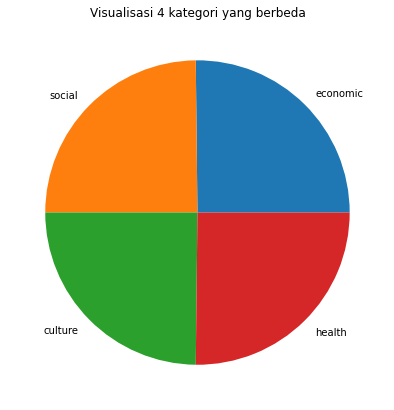

In [137]:

fig = plt.figure(figsize =(10, 7)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('Visualisasi 4 kategori yang berbeda')
plt.show() 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'total tweets')

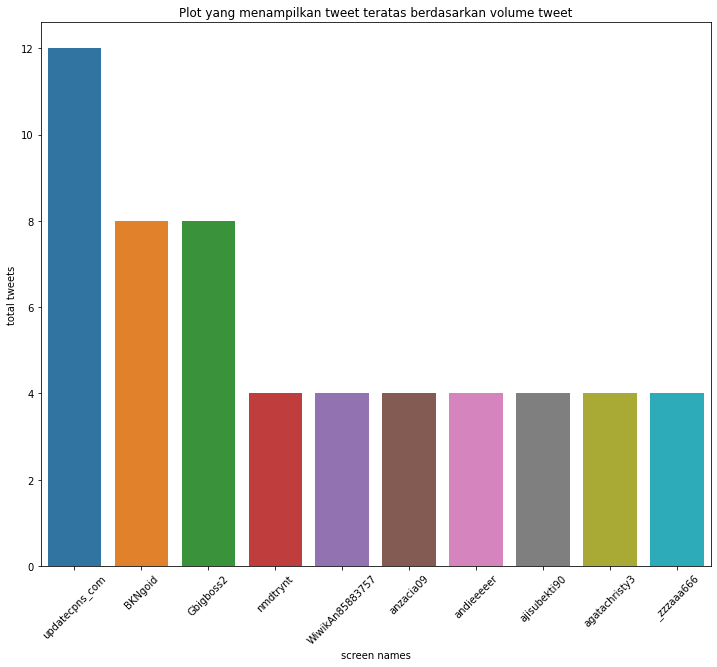

In [139]:

d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.total)
plt.title('Plot yang menampilkan tweet teratas berdasarkan volume tweet')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('total tweets')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'Ekonomi tweet')

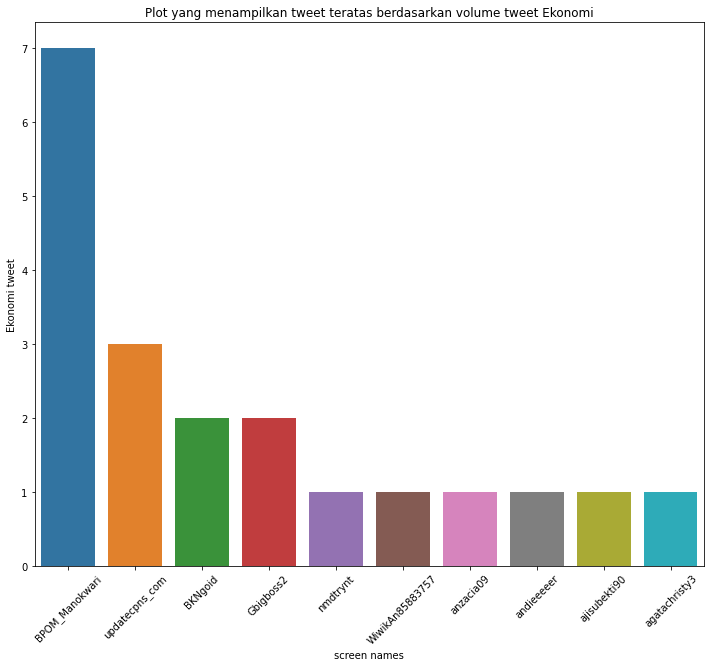

In [143]:
d = pivot_clusters.sort_values(by = 'economic', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.economic)
plt.title('Plot yang menampilkan tweet teratas berdasarkan volume tweet Ekonomi')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('Ekonomi tweet')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'social tweets')

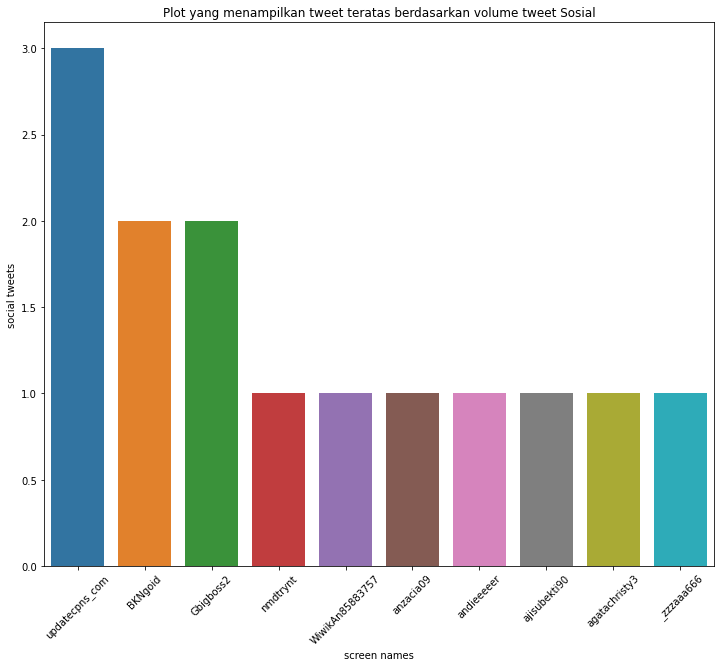

In [144]:

d = pivot_clusters.sort_values(by = 'social', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.social)
plt.title('Plot yang menampilkan tweet teratas berdasarkan volume tweet Sosial')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('social tweets')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'culture tweets')

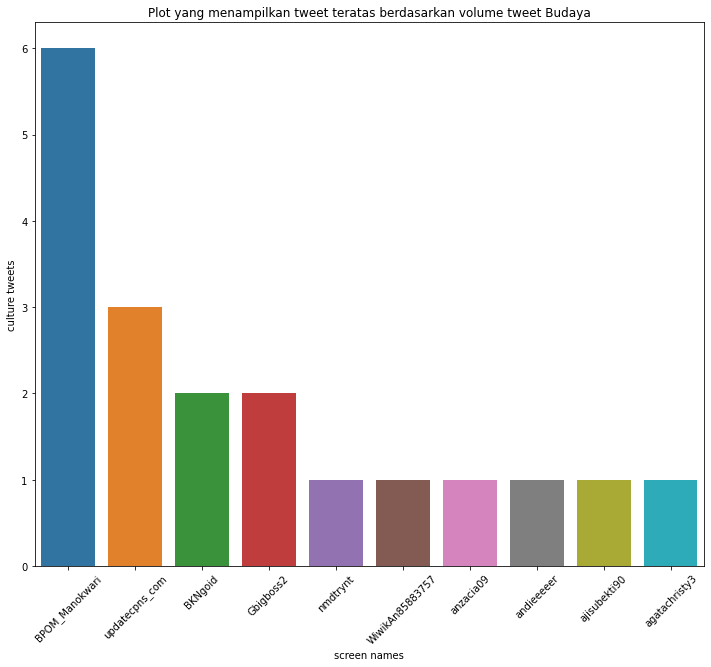

In [145]:

d = pivot_clusters.sort_values(by = 'culture', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.culture)
plt.title('Plot yang menampilkan tweet teratas berdasarkan volume tweet Budaya')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('culture tweets')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'health tweets')

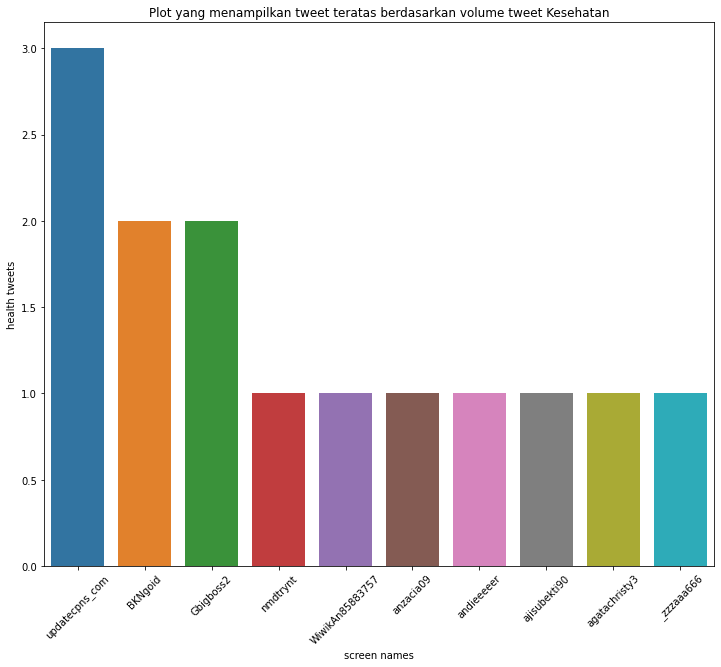

In [146]:

d = pivot_clusters.sort_values(by = 'health', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.health)
plt.title('Plot yang menampilkan tweet teratas berdasarkan volume tweet Kesehatan')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('health tweets')

#### Distribution test and skewness

In [147]:
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler


In [148]:
# drop the totals row.
print(pivot_clusters.shape)
pivot_clusters.drop(pivot_clusters.tail(1).index,inplace=True)
print(pivot_clusters.shape)

(130, 5)
(129, 5)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.55 and sigma = 0.81



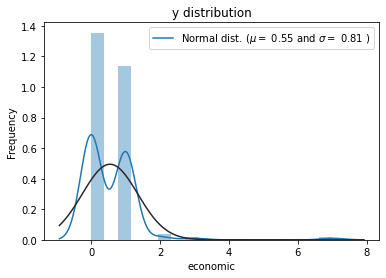

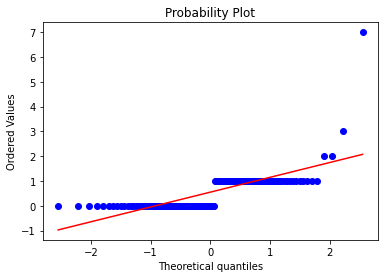

In [149]:
# Target variable
sns.distplot(pivot_clusters.economic , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.economic)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.title('Ecocnomy tweets distribution plot')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.economic, plot=plt)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.54 and sigma = 0.75



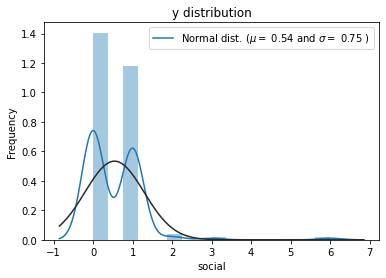

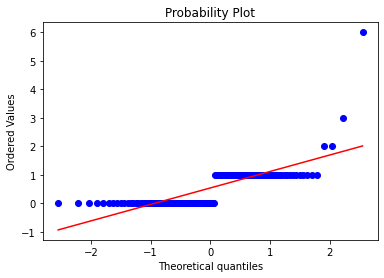

In [150]:
# Target variable
sns.distplot(pivot_clusters.social , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.social)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Social tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.social, plot=plt)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.54 and sigma = 0.75



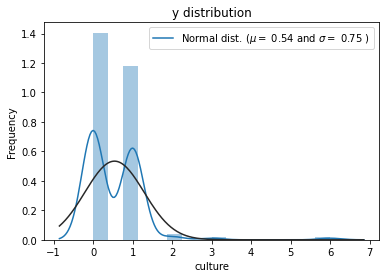

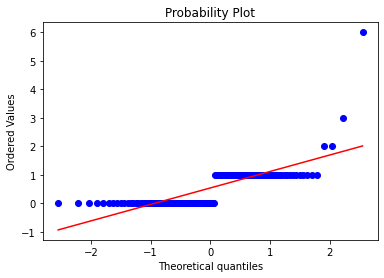

In [151]:
# Target variable
sns.distplot(pivot_clusters.culture , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.culture)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Culture tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.culture, plot=plt)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.55 and sigma = 0.81



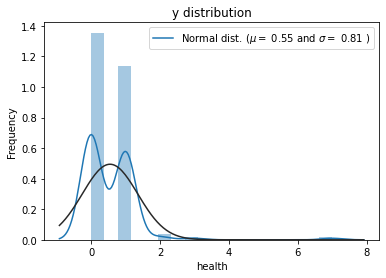

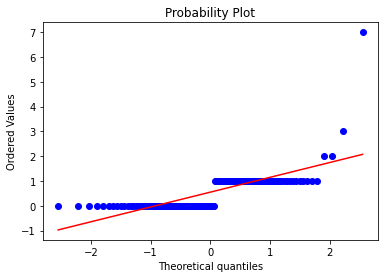

In [152]:
# Target variable
sns.distplot(pivot_clusters.health , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.health)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Health tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.health, plot=plt)
plt.show()


##  KMeans Clustering.

In [153]:
from sklearn.cluster import KMeans


### 2D Clusters.

#### * Socio-Economic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found sm

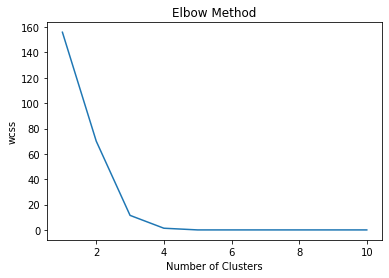

In [96]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['economic', 'social']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

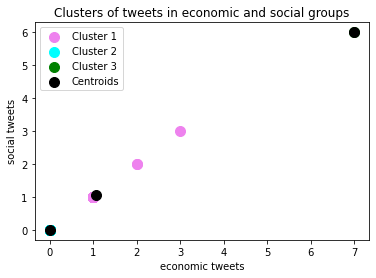

In [97]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('economic tweets')
plt.ylabel('social tweets')
plt.legend()
plt.show()

#### * Socio-Culture

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found sm

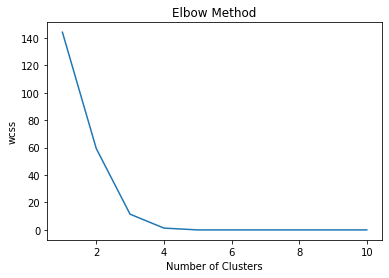

In [98]:
# X = pivot_clusters.iloc[:, [2,3]].values
X = pivot_clusters[['social', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

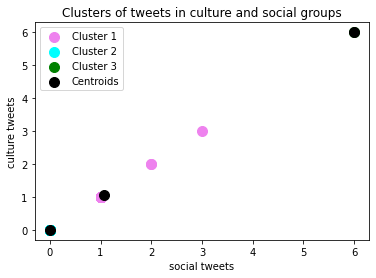

In [99]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in culture and social groups')
plt.xlabel('social tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

#### * Socio-Health

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found sm

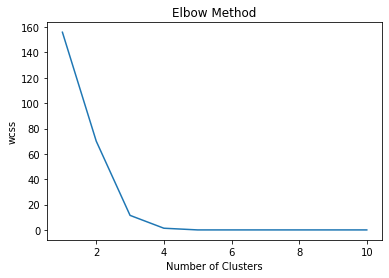

In [100]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['social', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


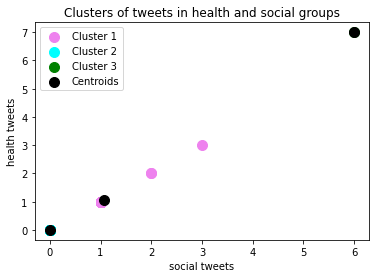

In [101]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in health and social groups')
plt.xlabel('social tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

#### * Economic-health

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found sm

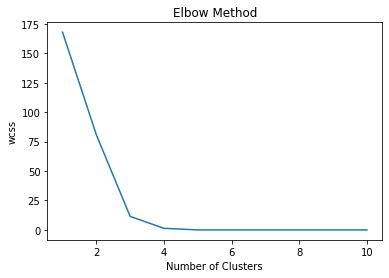

In [102]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


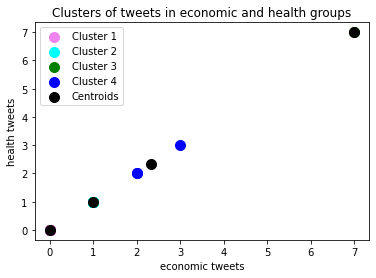

In [103]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and health groups')
plt.xlabel('economic tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

####  Economic-Culture

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found sm

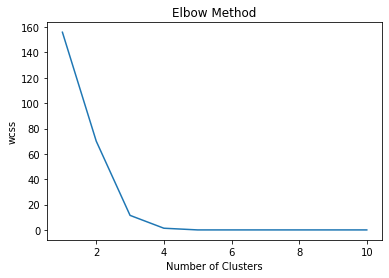

In [104]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


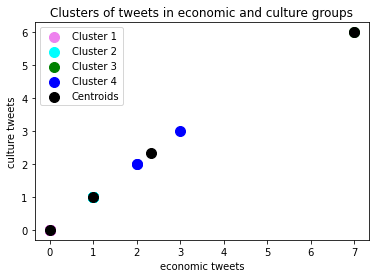

In [105]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and culture groups')
plt.xlabel('economic tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

### Health-Culture

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (5) found sm

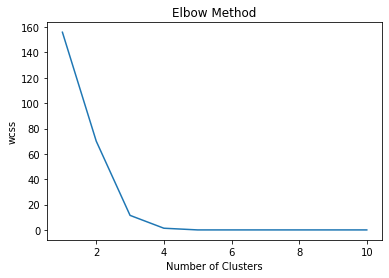

In [106]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['health', 'culture']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


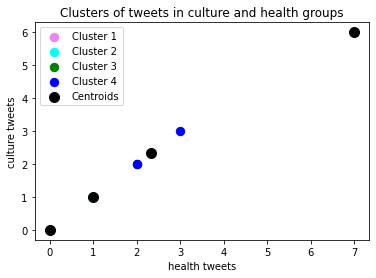

In [107]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=70, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=70, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in culture and health groups')
plt.xlabel('health tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

### KMeans with PCA

In [108]:
from sklearn.decomposition import PCA

In [109]:
seg = pivot_clusters.copy()
# seg = seg.drop

pca = PCA()
pca.fit(seg)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [110]:
pca.explained_variance_ratio_

array([9.99655365e-01, 3.44634693e-04, 2.64579464e-31, 8.29005812e-35,
       2.94432045e-35])

Text(0, 0.5, 'cummulative explained variance')

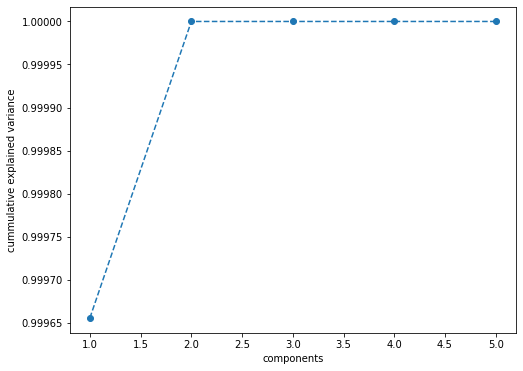

In [111]:
plt.figure(figsize = (8,6))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components')
plt.ylabel('cummulative explained variance')

In [112]:
pca = PCA(n_components = 2)
pca.fit(seg)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [113]:
scores = pca.transform(seg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-pack

Text(0, 0.5, 'wcss')

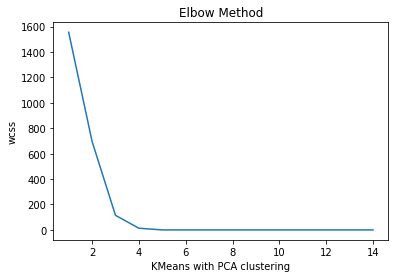

In [114]:
# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('KMeans with PCA clustering')
plt.ylabel('wcss')

In [115]:
n = 4
kmeans_pca = KMeans(n_clusters = n, init = 'k-means++', random_state = 0)
kmeans_pca.fit(scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [116]:
c = pd.concat([seg.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
c.columns.values[-2:] = ['component1', 'component2']
c['segment_kmeans_pca'] = kmeans_pca.labels_

In [117]:
c.tail()

,economic,social,culture,health,total,component1,component2,segment_kmeans_pca
124,0,0,0,0,0,-2.443848,0.034121,1
125,3,3,3,3,12,10.970590,-0.195727,3
126,1,1,1,1,4,2.027631,-0.042495,0
127,1,1,1,1,4,2.027631,-0.042495,0
128,0,0,0,0,0,-2.443848,0.034121,1


Text(0.5, 1.0, 'Clusters by PCA')

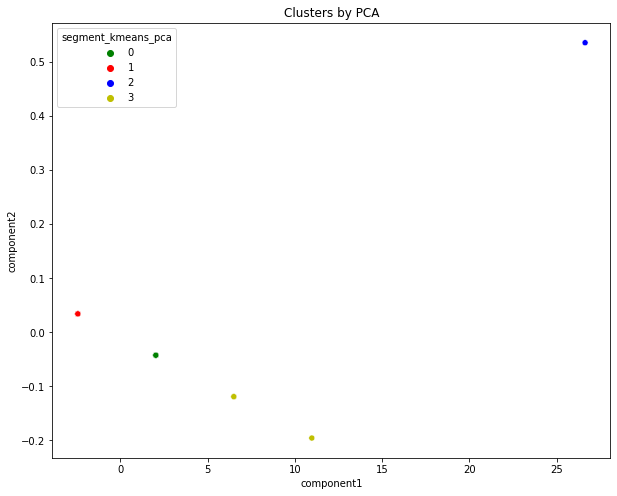

In [118]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = c['component1'], y = c['component2'], hue = c['segment_kmeans_pca'], palette = ['g', 'r', 'b', 'y'])
plt.title('Clusters by PCA')